In [1]:
import pandas as pd
df=pd.read_csv('eda_loan.csv')


In [3]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,4/16/2002,12/20/2003,2.15
1,46109,credit,9794,0,10984,10/21/2003,7/17/2005,1.25
2,46109,home,12734,1,10990,2/1/2006,7/5/2007,0.68
3,46109,cash,12518,1,10596,12/8/2010,5/5/2013,1.24
4,46109,credit,14049,1,11415,7/7/2010,5/21/2012,3.13


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB
None


In [9]:
print(df.shape)

(443, 8)


In [17]:
print(df.isnull().sum())

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


In [21]:
duplicates=df.duplicated().sum()
print(duplicates)

0


In [23]:
df=df.drop_duplicates()
print(df.shape)

(443, 8)


In [25]:
df.describe()

,client_id,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000,443.000000
mean,38911.060948,7982.311512,0.534989,11017.101580,3.217156
std,7768.681063,4172.891992,0.499338,581.826222,2.397168
min,25707.000000,559.000000,0.000000,10009.000000,0.010000
25%,32885.000000,4232.500000,0.000000,10507.500000,1.220000
50%,39505.000000,8320.000000,1.000000,11033.000000,2.780000
75%,46109.000000,11739.000000,1.000000,11526.000000,4.750000
max,49624.000000,14971.000000,1.000000,11991.000000,12.620000


In [27]:
df['loan_amount']

0      13672
1       9794
2      12734
3      12518
4      14049
       ...  
438    12963
439     1728
440     9329
441     4197
442     3643
Name: loan_amount, Length: 443, dtype: int64

In [33]:
import numpy as np

col='loan_amount'

mean=df[col].mean()
std=df[col].std()

z_scores=(df[col]-mean)/std

outliers=df[z_scores.abs() > 3]
outliers[[col]]

,loan_amount


In [35]:
q1=df[col].quantile(0.25)
q3=df[col].quantile(0.75)
iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

outliers_iqr=df[(df[col]<lower_bound)|(df[col]>upper_bound)]
outliers_iqr[[col]]

,loan_amount


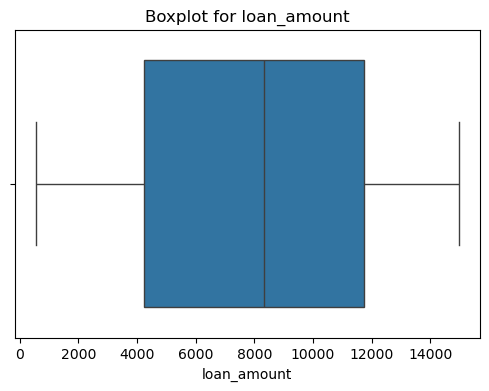

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df[col])
plt.title(f'Boxplot for {col}')
plt.show()

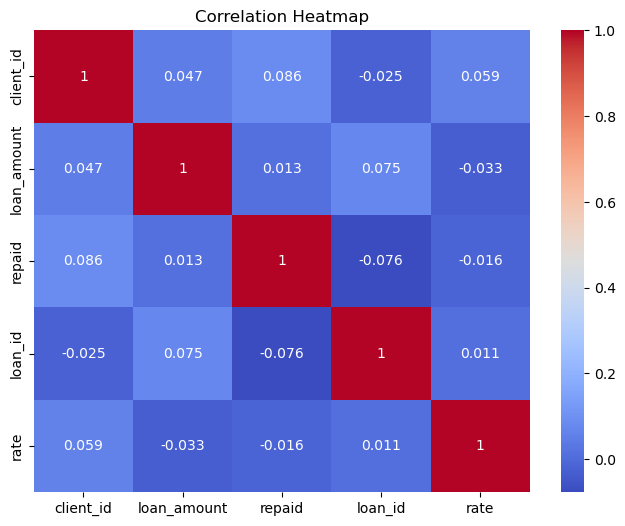

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#normalization and those lie around 0 and 1
normCols=['loan_amount','loan_id']
df_norm=df.copy()
df_norm[normCols]=MinMaxScaler().fit_transform(df_norm[normCols])
df_norm.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,0.909867,0,0.118063,4/16/2002,12/20/2003,2.15
1,46109,credit,0.640785,0,0.491927,10/21/2003,7/17/2005,1.25
2,46109,home,0.844782,1,0.494955,2/1/2006,7/5/2007,0.68
3,46109,cash,0.829795,1,0.296165,12/8/2010,5/5/2013,1.24
4,46109,credit,0.936026,1,0.709384,7/7/2010,5/21/2012,3.13


In [71]:
#standardization using z_scores
standardCols=['loan_amount','loan_id']

df_standard=df.copy()
df_standard[standardCols]=StandardScaler().fit_transform(df_standard[standardCols])
df_standard.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,1.365030,0,-1.331973,4/16/2002,12/20/2003,2.15
1,46109,credit,0.434647,0,-0.056957,10/21/2003,7/17/2005,1.25
2,46109,home,1.139991,1,-0.046633,2/1/2006,7/5/2007,0.68
3,46109,cash,1.088170,1,-0.724577,12/8/2010,5/5/2013,1.24
4,46109,credit,1.455477,1,0.684652,7/7/2010,5/21/2012,3.13


In [75]:
#label encoding
from sklearn.preprocessing import LabelEncoder

labelCol='loan_type'

le=LabelEncoder()

df_label=df.copy()
df_label[labelCol]=le.fit_transform(df_label[labelCol])
df_label.head()



,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,2,13672,0,10243,4/16/2002,12/20/2003,2.15
1,46109,1,9794,0,10984,10/21/2003,7/17/2005,1.25
2,46109,2,12734,1,10990,2/1/2006,7/5/2007,0.68
3,46109,0,12518,1,10596,12/8/2010,5/5/2013,1.24
4,46109,1,14049,1,11415,7/7/2010,5/21/2012,3.13


In [77]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,4/16/2002,12/20/2003,2.15
1,46109,credit,9794,0,10984,10/21/2003,7/17/2005,1.25
2,46109,home,12734,1,10990,2/1/2006,7/5/2007,0.68
3,46109,cash,12518,1,10596,12/8/2010,5/5/2013,1.24
4,46109,credit,14049,1,11415,7/7/2010,5/21/2012,3.13


In [79]:
#one hot encoding

df_one=pd.get_dummies(df,columns=['loan_type'],drop_first=True)
df_one.head()

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_type_credit,loan_type_home,loan_type_other
0,46109,13672,0,10243,4/16/2002,12/20/2003,2.15,False,True,False
1,46109,9794,0,10984,10/21/2003,7/17/2005,1.25,True,False,False
2,46109,12734,1,10990,2/1/2006,7/5/2007,0.68,False,True,False
3,46109,12518,1,10596,12/8/2010,5/5/2013,1.24,False,False,False
4,46109,14049,1,11415,7/7/2010,5/21/2012,3.13,True,False,False
